In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Country-data.csv')

In [4]:
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [7]:
categorical_data = df.select_dtypes(include=['object']).columns
numerical_data = df.select_dtypes(include=['float64', 'int64']).columns

In [8]:
df.set_index('country', inplace=True)

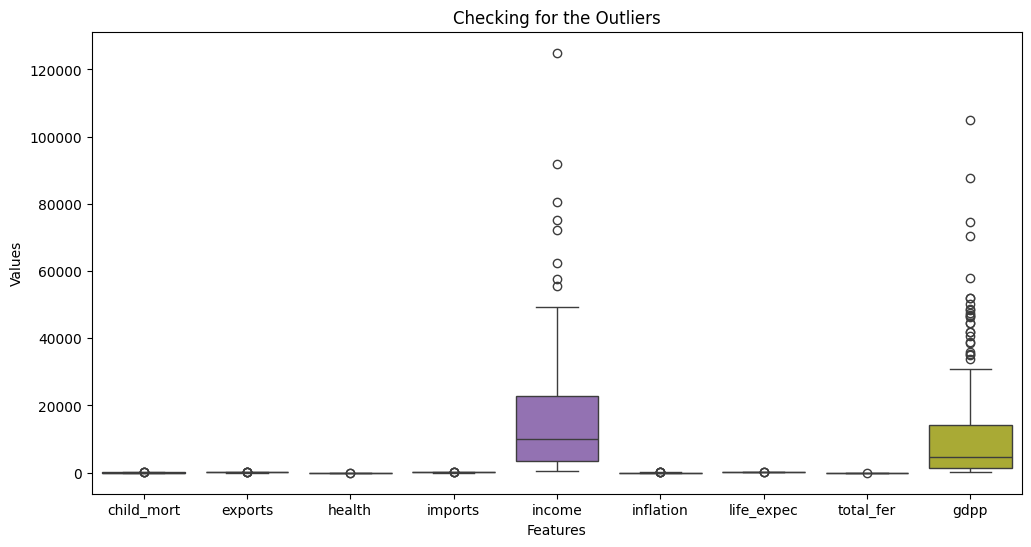

In [9]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_data])
plt.title("Checking for the Outliers")
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [10]:
lower_bound = 0.05
upper_bound = 0.95

for col in numerical_data:
    lower = df[col].quantile(lower_bound)
    upper = df[col].quantile(upper_bound)
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [12]:
df = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

In [13]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Albania,-0.484427,-0.782019,0.289956,0.096801,-0.203198,-0.290376,0.856696,-0.938302,-0.428740
Algeria,0.041545,-0.108883,-1.327657,-1.052742,0.267691,2.173363,0.894635,0.388227,-0.337463
Antigua and Barbuda,-0.794111,0.350661,-0.063472,0.785191,1.250692,-0.937612,0.951544,-0.424807,1.571937
Armenia,-0.410692,-1.248036,-1.171333,-0.123751,-0.715310,0.405667,0.287605,-0.895511,-0.643362
Azerbaijan,0.626504,0.920237,-0.165423,-1.767866,0.759192,1.685284,-0.509122,-0.649461,0.002972
...,...,...,...,...,...,...,...,...,...
Turkey,-0.361536,-1.273926,0.419093,-1.447063,1.076289,0.244389,1.217120,-0.403411,1.201898
Ukraine,-0.725292,0.454220,1.085169,0.263886,-0.537735,1.600400,-0.262516,-1.162957,-0.705035
Uruguay,-0.779364,-0.892051,1.513360,-1.453746,0.933595,-0.201249,0.875665,-0.478296,1.497929


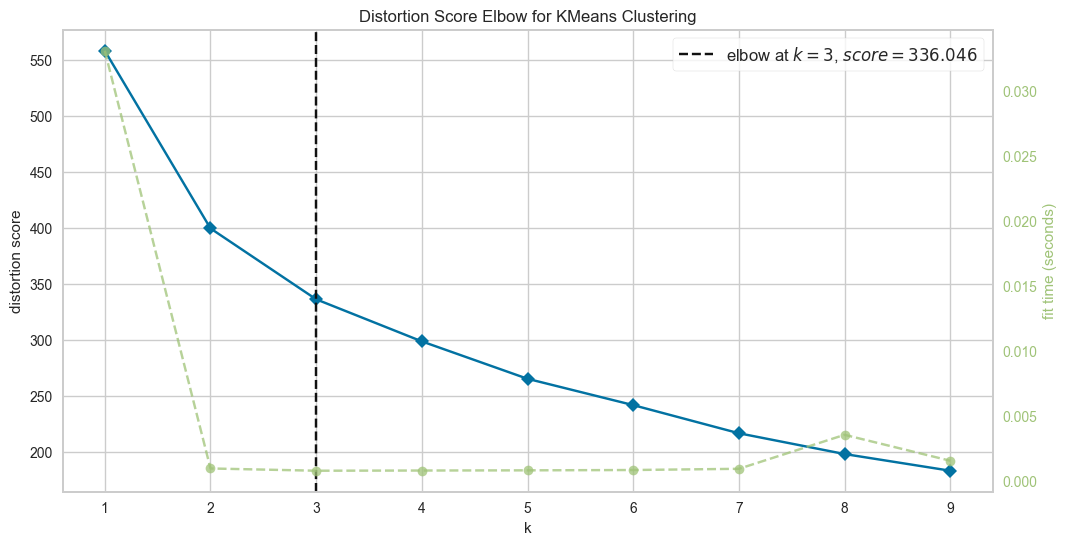

In [14]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

plt.figure(figsize=(12, 6))
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(1, 10))
visualizer.fit(df)
visualizer.show()

k_optimal = visualizer.elbow_value_

In [15]:
k = 3

In [16]:
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

In [17]:
cluster_stats = df.groupby('cluster').mean()
cluster_stats

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,1.179818,-0.320047,-0.400333,-0.103283,-0.911117,0.057645,-1.339046,1.258762,-0.795803
1,-0.740709,0.604852,0.431141,0.278468,1.081334,-0.284521,0.646305,-0.758871,1.081691
2,-0.107562,-0.341083,-0.128324,-0.186407,-0.383811,0.222381,0.300251,-0.143543,-0.461015


In [18]:
cluster_counts = df['cluster'].value_counts().sort_index()

Text(0, 0.5, 'PC2 (Explained Variance: 0.17)')

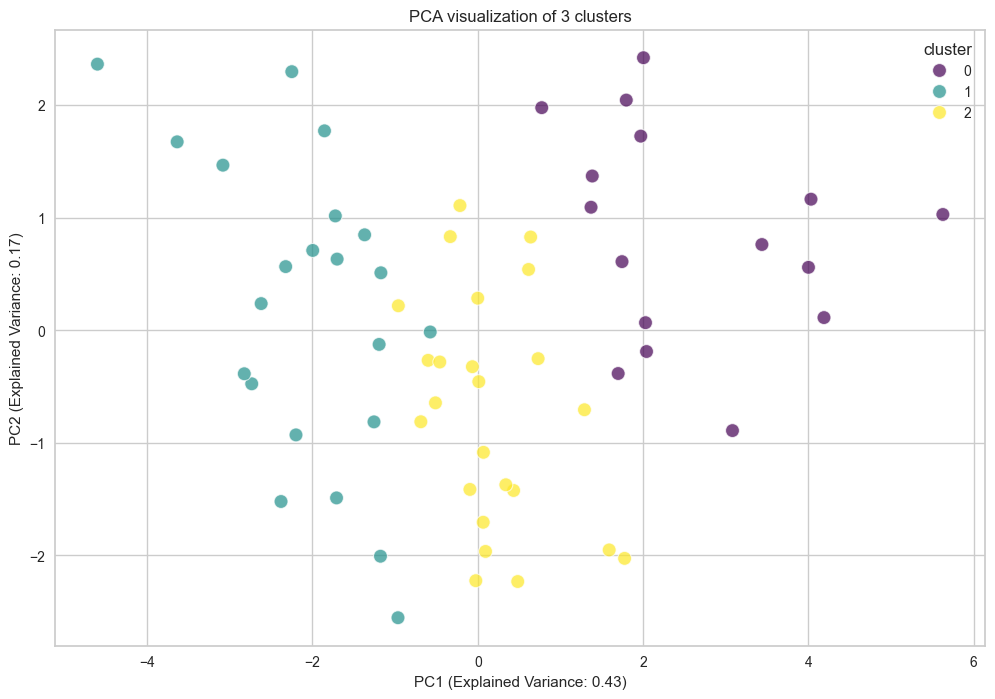

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=df.index)
df_pca['cluster'] = df['cluster']

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title(f'PCA visualization of {k_optimal} clusters')
plt.xlabel(f'PC1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'PC2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2f})')

The average silhouette score for k=3 is: 0.16445301779087604


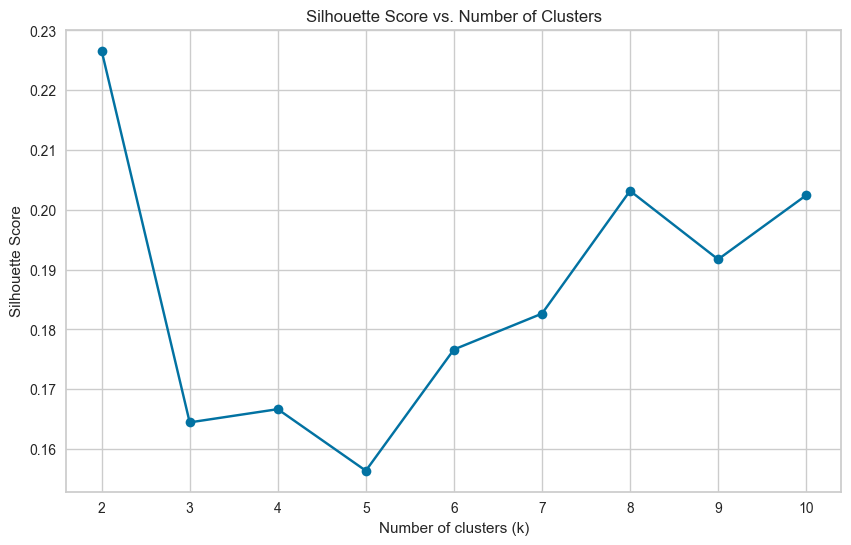

In [21]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_avg = silhouette_score(df.drop('cluster', axis=1), df['cluster'])
print(f"The average silhouette score for k={k} is: {silhouette_avg}")

range_n_clusters = range(2, 11)
silhouette_scores = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df.drop('cluster', axis=1) if 'cluster' in df.columns else df)
    silhouette_scores.append(silhouette_score(df.drop('cluster', axis=1) if 'cluster' in df.columns else df, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()